# Improving Your Data Modeling Work Through Open-Source Software

PyData NYC 2022

Eduardo Blancas and Ido Michael from [Ploomber](https://ploomber.io/)

# What you'll learn

1. How to run experiments in parallel [20 mins]
2. Compare experiment's results [15 mins]

Break: 15 mins

---

3. Debugging notebooks [15 mins]
4. Profiling notebooks (CPU, memory usage) [15 mins]
5. Scaling experiments in the cloud [10 mins]

## Want to get updates delivered to your inbox?

Subscribe to our Data Science newslettter!

In [22]:
from IPython.display import HTML; HTML('<div id="revue-embed"> <form action="https://www.getrevue.co/profile/ploomber/add_subscriber" method="post" id="revue-form" name="revue-form" target="_blank"> <div class="revue-form-group"> <label for="member_email">Email address</label> <input class="revue-form-field" placeholder="Your email address..." type="email" name="member[email]" id="member_email"> </div> <div class="revue-form-group"> <label for="member_first_name">First name <span class="optional">(Optional)</span></label> <input class="revue-form-field" placeholder="First name... (Optional)" type="text" name="member[first_name]" id="member_first_name"> </div> <div class="revue-form-group"> <label for="member_last_name">Last name <span class="optional">(Optional)</span></label> <input class="revue-form-field" placeholder="Last name... (Optional)" type="text" name="member[last_name]" id="member_last_name"> </div> <div class="revue-form-actions"> <input type="submit" value="Subscribe" name="member[subscribe]" id="member_submit"> </div> </form> </div>')

# Running experiments in parallel

When doing data analysis, a common pattern involves running the same code with different parameters. In this section we'll show you how you can create *notebook templates*: Jupyter notebooks that you can parametrize and run in parallel using [Ploomber](https://github.com/ploomber/ploomber) an open-source framework.

```sh
# packages required to run this section
pip install ploomber pandas scikit-learn sklearn-evaluation
```

Ploomber allows you to parametrize a notebook via a `pipeline.yaml` file:

In [26]:
from pathlib import Path
from IPython.display import Markdown

def display(path):
    """Utility function to display the contents of a file
    """
    path = Path(path)
    content = path.read_text()
    extension = path.suffix[1:]
    return Markdown(f'```{extension}\n{content}\n```\n')


display("parallel/pipeline.yaml")

```yaml
executor: parallel

tasks:
  - source: fit.ipynb
    name: fit-[[model_type]]-[[n_estimators]]-[[criterion]]-[[max_depth]]
    static_analysis: disable
    product:
      nb: output/reports/model_type=[[model_type]]/n_estimators=[[n_estimators]]-criterion=[[criterion]]-max_depth=[[max_depth]].ipynb
      model: output/models/model_type=[[model_type]]/n_estimators=[[n_estimators]]-criterion=[[criterion]]-max_depth=[[max_depth]].pickle
    grid:
      - model_type: [sklearn.ensemble.RandomForestClassifier]
        n_estimators: [3, 5, 10, 15, 20]
        criterion: [gini, entropy, log_loss]
        max_depth: [5, 10, 100]
```


In [11]:
from ploomber.spec import DAGSpec

dag = DAGSpec("parallel/pipeline.yaml").to_dag()
dag.status()

  0%|          | 0/45 [00:00<?, ?it/s]

name,Last run,Outdated?,Product,Doc (short),Location
fit-sklearn .ensemble.R andomForest Classifier- 3-gini-5,Has not been run,Source code,"MetaProduct ({'model': File('paral le...h=5- 0.pickle'), 'nb': File( 'paralle... th=5- 0.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-gini-10,Has not been run,Source code,"MetaProduct ({'model': File('paral le...=10- 1.pickle'), 'nb': File( 'paralle... h=10- 1.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-gini-100,Has not been run,Source code,"MetaProduct ({'model': File('paral le...100- 2.pickle'), 'nb': File( 'paralle... =100- 2.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-entropy-5,Has not been run,Source code,"MetaProduct ({'model': File('paral le...h=5- 3.pickle'), 'nb': File( 'paralle... th=5- 3.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-entropy- 10,Has not been run,Source code,"MetaProduct ({'model': File('paral le...=10- 4.pickle'), 'nb': File( 'paralle... h=10- 4.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-entropy- 100,Has not been run,Source code,"MetaProduct ({'model': File('paral le...100- 5.pickle'), 'nb': File( 'paralle... =100- 5.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-log_loss- 5,Has not been run,Source code,"MetaProduct ({'model': File('paral le...h=5- 6.pickle'), 'nb': File( 'paralle... th=5- 6.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-log_loss- 10,Has not been run,Source code,"MetaProduct ({'model': File('paral le...=10- 7.pickle'), 'nb': File( 'paralle... h=10- 7.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 3-log_loss- 100,Has not been run,Source code,"MetaProduct ({'model': File('paral le...100- 8.pickle'), 'nb': File( 'paralle... =100- 8.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb
fit-sklearn .ensemble.R andomForest Classifier- 5-gini-5,Has not been run,Source code,"MetaProduct ({'model': File('paral le...h=5- 9.pickle'), 'nb': File( 'paralle... th=5- 9.ipynb')})",,/Users/Edu/ dev/pydata- nyc- 22/parallel /fit.ipynb


In [12]:
len(dag)

45

In [13]:
dag.build()

  0%|          | 0/45 [00:00<?, ?it/s]

Executing: 100%|██████████| 20/20 [00:09<00:00,  2.07cell/s]


name,Ran?,Elapsed (s),Percentage
fit-sklearn.ensemble.RandomForestClas sifier-3-gini-5,True,10.4233,2.04681
fit-sklearn.ensemble.RandomForestClas sifier-3-gini-10,True,10.3642,2.03521
fit-sklearn.ensemble.RandomForestClas sifier-3-gini-100,True,10.2571,2.01418
fit-sklearn.ensemble.RandomForestClas sifier-3-entropy-5,True,10.2184,2.00656
fit-sklearn.ensemble.RandomForestClas sifier-3-entropy-10,True,10.0233,1.96826
fit-sklearn.ensemble.RandomForestClas sifier-3-entropy-100,True,10.224,2.00768
fit-sklearn.ensemble.RandomForestClas sifier-3-log_loss-5,True,10.3994,2.04213
fit-sklearn.ensemble.RandomForestClas sifier-3-log_loss-10,True,10.2846,2.01957
fit-sklearn.ensemble.RandomForestClas sifier-3-log_loss-100,True,10.8816,2.13681
fit-sklearn.ensemble.RandomForestClas sifier-5-gini-5,True,10.5194,2.06568


In [14]:
%%sh
tree parallel/output

parallel/output
├── models
│   └── model_type=sklearn.ensemble.RandomForestClassifier
│       ├── n_estimators=10-criterion=entropy-max_depth=10-22.pickle
│       ├── n_estimators=10-criterion=entropy-max_depth=100-23.pickle
│       ├── n_estimators=10-criterion=entropy-max_depth=5-21.pickle
│       ├── n_estimators=10-criterion=gini-max_depth=10-19.pickle
│       ├── n_estimators=10-criterion=gini-max_depth=100-20.pickle
│       ├── n_estimators=10-criterion=gini-max_depth=5-18.pickle
│       ├── n_estimators=10-criterion=log_loss-max_depth=10-25.pickle
│       ├── n_estimators=10-criterion=log_loss-max_depth=100-26.pickle
│       ├── n_estimators=10-criterion=log_loss-max_depth=5-24.pickle
│       ├── n_estimators=15-criterion=entropy-max_depth=10-31.pickle
│       ├── n_estimators=15-criterion=entropy-max_depth=100-32.pickle
│       ├── n_estimators=15-criterion=entropy-max_depth=5-30.pickle
│       ├── n_estimators=15-criterion=gini-max_depth=10-28.pickle
│       ├── n_estimators=1

# Analyzing results

Now that we've produced our results, we can compare them with [sklearn-evaluation](https://github.com/ploomber/sklearn-evaluation). [More info in our docs](https://sklearn-evaluation.readthedocs.io/en/latest/user_guide/NotebookCollection.html)


`NotebookCollection` can extract outputs from Jupyter notebooks. For example, you can use it to compare the plots in your experiments. You only need to tag the cells that you want to compare. Here's how to tag a cell (we tagged a few already in the notebook we ran earlier):

![tag-cell](_static/tag-cell.gif)


In [39]:
from glob import glob
import re

from sklearn_evaluation import NotebookCollection

In [40]:
# get the paths to the notebooks where n_estimators=20
paths = sorted(glob('parallel/output/reports/**/n_estimators=20-*.ipynb', recursive=True))
len(paths)

9

In [41]:
def parse_params(path):
    """Parse the parameters from a given path
    """
    result = {k: v for k, v in re.findall(r"(\w+)=(\w+)", path)}
    name = f'criterion={result["criterion"]}, max_depth={result["max_depth"]}'
    return name

In [42]:
# initialize collection
collection = NotebookCollection(paths, ids=[parse_params(path) for path in paths])

# check the tags that we have
list(collection)

['n_estimators',
 'criterion',
 'max_depth',
 'accuracy',
 'precision',
 'recall',
 'f1',
 'confusion-matrix',
 'classification-report',
 'precision-recall']

In [43]:
collection['confusion-matrix']

In [44]:
collection['classification-report']

In [45]:
collection['precision-recall']

## Querying notebooks with SQL

Alternatively, you can index the notebook's contents in a SQLite database and then query them with SQL. This will allow you to sort, filter experiments and write sophisticated queries. When your number of experiment grows, using SQL allows you to easily learn more from them.

[More in our documentation.](https://sklearn-evaluation.readthedocs.io/en/latest/user_guide/nbdb.html)

Packages you need:

```sh
pip install sklearn-evaluation jupysql pandas
```

In [1]:
from sklearn_evaluation import NotebookDatabase

db = NotebookDatabase('notebooks.db',
                      'parallel/output/reports/**/*.ipynb')
db.index(verbose=False, update=True)

In [2]:
%load_ext sql

In [5]:
%%sql sqlite:///notebooks.db
SELECT
    json_extract(c, '$.n_estimators') AS n_estimators,
    json_extract(c, '$.max_depth') AS max_depth,
    json_extract(c, '$.criterion') AS criterion,
    json_extract(c, '$.accuracy') AS accuracy,
    json_extract(c, '$.recall') AS recall,
    json_extract(c, '$.precision') AS precision,
    json_extract(c, '$.f1') AS f1
FROM nbs
ORDER BY f1 DESC
LIMIT 10

Done.


n_estimators,max_depth,criterion,accuracy,recall,precision,f1
20,10,log_loss,0.7745454545454545,0.8448804414469651,0.7372926698769395,0.7874285714285714
20,10,entropy,0.7727272727272727,0.838749233599019,0.7374663072776281,0.7848537005163512
15,10,entropy,0.7715151515151515,0.8405885959534029,0.7351206434316354,0.784324942791762
20,100,entropy,0.7827272727272727,0.7927651747394237,0.7733253588516746,0.7829246139872843
15,100,gini,0.7763636363636364,0.8154506437768241,0.7526881720430108,0.7828134196586228
15,100,entropy,0.7751515151515151,0.8191293684855917,0.749298934380258,0.7826596367896895
15,100,log_loss,0.7757575757575758,0.8160637645616187,0.7515527950310559,0.7824808935920047
15,10,gini,0.7724242424242425,0.8277130594727161,0.7417582417582418,0.7823819182845552
20,100,log_loss,0.7796969696969697,0.7884733292458614,0.7709832134292566,0.7796301909669596
15,10,log_loss,0.766969696969697,0.8270999386879215,0.7347494553376906,0.7781944043841938


You can also use pandas:

In [12]:
import sqlite3
import pandas as pd

con = sqlite3.connect("notebooks.db")

df = pd.read_sql_query("""
SELECT
    json_extract(c, '$.n_estimators') AS n_estimators,
    json_extract(c, '$.max_depth') AS max_depth,
    json_extract(c, '$.criterion') AS criterion,
    json_extract(c, '$.accuracy') AS accuracy,
    json_extract(c, '$.recall') AS recall,
    json_extract(c, '$.precision') AS precision,
    json_extract(c, '$.f1') AS f1
FROM nbs
ORDER BY f1 DESC
""", con=con)

df.head()

,n_estimators,max_depth,criterion,accuracy,recall,precision,f1
0,20,10,log_loss,0.774545,0.844880,0.737293,0.787429
1,20,10,entropy,0.772727,0.838749,0.737466,0.784854
2,15,10,entropy,0.771515,0.840589,0.735121,0.784325
3,20,100,entropy,0.782727,0.792765,0.773325,0.782925
4,15,100,gini,0.776364,0.815451,0.752688,0.782813


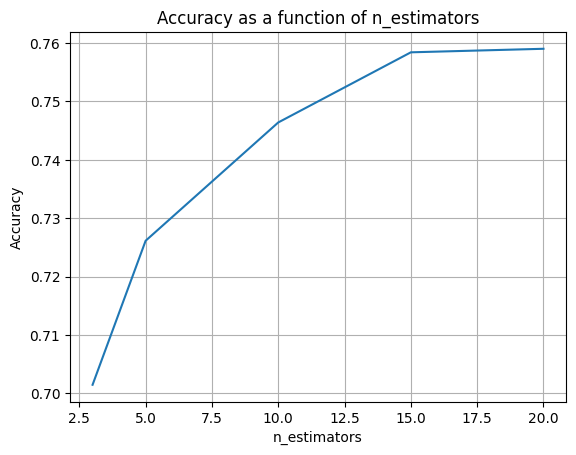

In [23]:
import matplotlib.pyplot as plt

df_agg = df.groupby('n_estimators').mean(numeric_only=True)

ax = plt.gca()
df_agg.accuracy.plot(ax=ax)
ax.grid()
_ = ax.set(ylabel='Accuracy', title='Accuracy as a function of n_estimators')

We can see the accuracy increases as the number of estimators increases.

# Debugging notebooks

When running notebooks as parallel experiments, it can get difficult to debug them. Ploomber allows you to serialize the variables' values so you can inspect them at any moment. It's powered by our [debuglater](https://github.com/ploomber/debuglater) project; which you can also use independently.

We'll create a simple `pipeline.yaml` that runs one notebook:

In [27]:
display('debugging/pipeline.yaml')

```yaml
tasks:
  - source: notebook.ipynb
    product:
      nb: output.ipynb
```


To enable the debug later feature, pass the `--debuglater` flag:

In [28]:
%%sh
ploomber build -e debugging/pipeline.yaml --debuglater

Loading pipeline...


Executing:  33%|███▎      | 1/3 [00:01<00:02,  1.31s/cell]
Executing: 4cell [00:02,  1.54cell/s]                     
Building task 'notebook': 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

=============================== DAG build failed ===============================
- NotebookRunner: notebook -> MetaProduct({'nb': File('debugging/output.ipynb')}) -
------------ /Users/Edu/dev/pydata-nyc-22/debugging/notebook.ipynb -------------

---------------------------------------------------------------------------
Exception encountered at "In [4]":
---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
Cell In [4], line 3
      1 x = 1
      2 y = 0
----> 3 x/y

ZeroDivisionError: division by zero
Serializing traceback to: notebook.dump
To debug: dltr notebook.dump

ploomber.exceptions.TaskBuildError: Error when executing task 'notebook'. Partially executed notebook available at /Users/Edu/dev/py

CalledProcessError: Command 'b'ploomber build -e debugging/pipeline.yaml --debuglater\n'' returned non-zero exit status 1.

## Start debugging session

**Note: run the next command in a new Terminal window, it won't work on Jupyter.**

```sh
dltr notebook.dump
```

Here's how to open a terminal window:

![open-terminal](_static/open-terminal.gif)

# Profiling notebooks

Sometimes our experiments might break if we run too many at the same time and we run out of memory. In such cases, we might want to profile them to see how much memory they use and adjust the number of parallel experiments to run.

Unfortunately, most notebook runners execute the notebook in a separate process, which makes it difficult to monitor. Here's an example using papermill:

In [30]:
%%sh
mprof run papermill profiling/notebook.ipynb profiling/tmp.ipynb

Input Notebook:  profiling/notebook.ipynb
Output Notebook: profiling/tmp.ipynb
Executing: 100%|██████████| 8/8 [00:22<00:00,  2.76s/cell]


mprof: Sampling memory every 0.1s
running new process


In [31]:
%%sh
mprof plot --output profiling/plot.png

Using last profile data.


The memory consuption remains flat because `papermill` is running the notebook in a separate process:

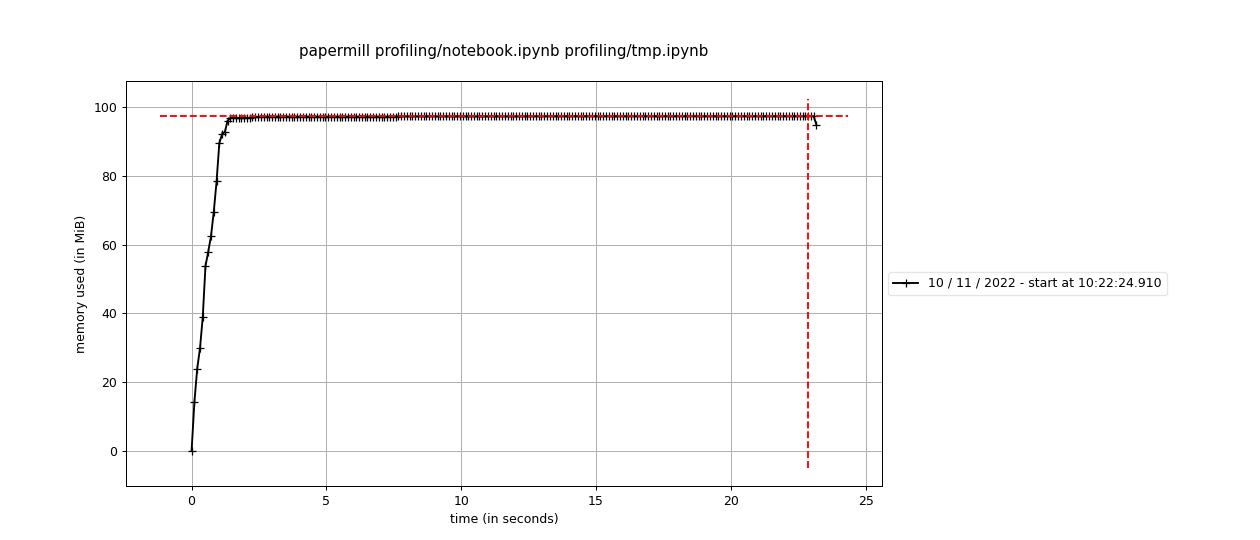

In [32]:
from IPython.display import Image
Image('profiling/plot.png')

However, we can fix this is we switch to the [ploomber-engine](https://github.com/ploomber/ploomber-engine) a notebook executor we developed that runs notebooks in the same process:

In [34]:
display('profiling/pipeline.yaml')

```yaml
tasks:
  - source: notebook.ipynb
    product:
      nb: tmp.ipynb
    papermill_params:
      engine_name: profiling
```


In [35]:
%%sh
mprof run ploomber build -e profiling/pipeline.yaml

Loading pipeline...
Notebook notebook.ipynb is missing the parameters cell, adding it at the top of the file...


Building task 'notebook': 100%|██████████| 1/1 [00:20<00:00, 20.90s/it]


name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
notebook  True           20.892           100
mprof: Sampling memory every 0.1s
running new process


In [36]:
%%sh
mprof plot --output profiling/plot.png

Using last profile data.


The curve no longer remains flat:

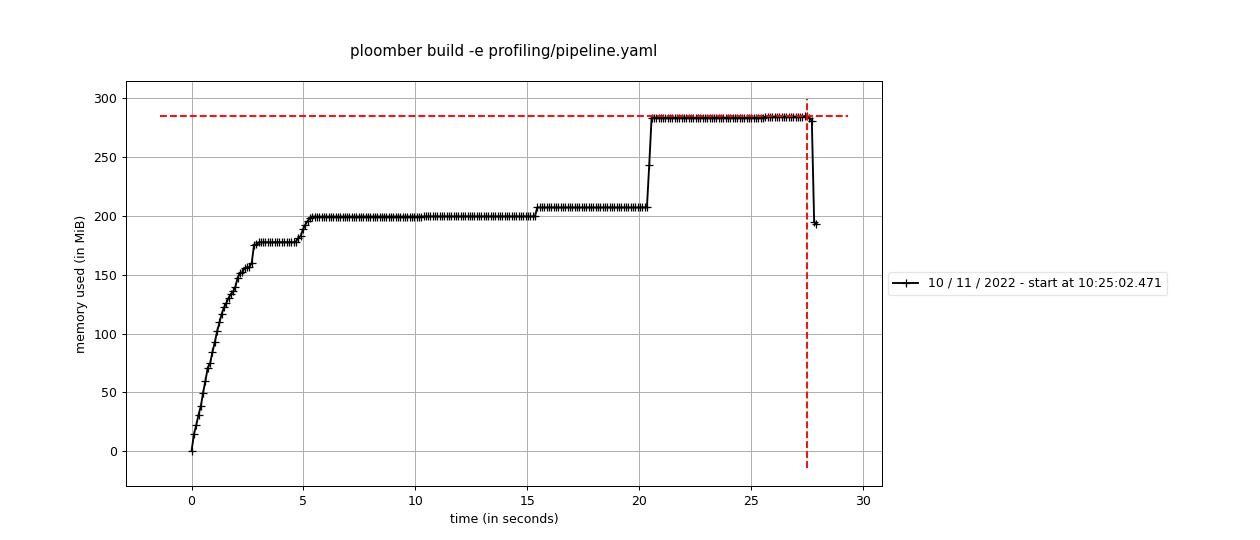

In [37]:
Image('profiling/plot.png')

# Scaling experiments by running them in the cloud

Profilig notebooks is a time-consuming process. As an alternative, we might want to sping up more resources and shut them down upon execution, we can do that easily (for free!) with Ploomber Cloud.

To run in the cloud, we need to get a [Ploomber API](https://cloud.ploomber.io/register) key. Once you're in, copy your key and set it with the following command:

```sh
ploomber cloud set-key {your-key}
```

The majority of Ploomber Cloud's codebase is open-source. You can spin up a similar service on your own infrastructure. Here's a blog post to do it on [AWS Batch](https://ploomber.io/blog/ds-platform-part-i/).

In [11]:
%%sh
cd parallel
ploomber cloud build

Zipping project -> project.zip
Deleting existing project.zip...
Ignoring: ./output/models/ada-boost
Ignoring: ./output/models/random-forest
Ignoring: ./output/models/ada-boost/1-1-6.pickle
Ignoring: ./output/models/ada-boost/5-2-11.pickle
Ignoring: ./output/models/ada-boost/1-2-7.pickle
Ignoring: ./output/models/ada-boost/5-1-10.pickle
Ignoring: ./output/models/ada-boost/3-2-9.pickle
Ignoring: ./output/models/ada-boost/3-1-8.pickle
Ignoring: ./output/models/random-forest/1-entropy-1.pickle
Ignoring: ./output/models/random-forest/5-entropy-5.pickle
Ignoring: ./output/models/random-forest/3-gini-2.pickle
Ignoring: ./output/models/random-forest/1-gini-0.pickle
Ignoring: ./output/models/random-forest/3-entropy-3.pickle
Ignoring: ./output/models/random-forest/5-gini-4.pickle
Ignoring: ./output/reports/ada-boost
Ignoring: ./output/reports/random-forest
Ignoring: ./output/reports/ada-boost/5-2-11.ipynb
Ignoring: ./output/reports/ada-boost/5-1-10.ipynb
Ignoring: ./output/reports/ada-boost/3-1-

In [13]:
%%sh
ploomber cloud logs @latest --image | tail -n 10


[Container] 2022/11/09 21:00:25 Entering phase POST_BUILD

[Container] 2022/11/09 21:00:25 Phase complete: POST_BUILD State: SUCCEEDED

[Container] 2022/11/09 21:00:25 Phase context status code:  Message: 


Successful Docker build! Monitor task status:
  $ ploomber cloud status 86b428da-772d-430e-bf78-6b4e96ce2d73 --watch


In [14]:
%%sh
ploomber cloud status @latest

taskid               name               runid                status
-------------------  -----------------  -------------------  --------
0d4c1a58-64a5-4520-  fit-ada-boost-5-1  86b428da-772d-430e-  finished
9a25-616a81462d21                       bf78-6b4e96ce2d73
682a56a9-b17c-424b-  fit-random-        86b428da-772d-430e-  finished
9d6c-07e5d54af090    forest-3-entropy   bf78-6b4e96ce2d73
ff3e516f-b681-4f85-  fit-random-        86b428da-772d-430e-  finished
99cf-ba36a3d41ac5    forest-5-entropy   bf78-6b4e96ce2d73
e5cf7e41-cb36-45c0-  fit-ada-boost-3-2  86b428da-772d-430e-  finished
b988-30d69a2fcc78                       bf78-6b4e96ce2d73
97f58461-df08-47dc-  fit-random-        86b428da-772d-430e-  finished
96fc-89106f888666    forest-1-entropy   bf78-6b4e96ce2d73
ac4bad84-d82c-4e7f-  fit-ada-boost-3-1  86b428da-772d-430e-  finished
a522-6601b1d78ec8                       bf78-6b4e96ce2d73
07053ee7-4faa-4da9-  fit-random-        86b428da-772d-430e-  finished
9267-5b794bdf4c11    for

In [18]:
%%sh
ploomber cloud download 'output/*' --summary

Downloaded 48 files.


## Let's keep in touch!

Get monthly updates from us (new blog posts, open-source projects, etc.):

In [46]:
from IPython.display import HTML; HTML('<div id="revue-embed"> <form action="https://www.getrevue.co/profile/ploomber/add_subscriber" method="post" id="revue-form" name="revue-form" target="_blank"> <div class="revue-form-group"> <label for="member_email">Email address</label> <input class="revue-form-field" placeholder="Your email address..." type="email" name="member[email]" id="member_email"> </div> <div class="revue-form-group"> <label for="member_first_name">First name <span class="optional">(Optional)</span></label> <input class="revue-form-field" placeholder="First name... (Optional)" type="text" name="member[first_name]" id="member_first_name"> </div> <div class="revue-form-group"> <label for="member_last_name">Last name <span class="optional">(Optional)</span></label> <input class="revue-form-field" placeholder="Last name... (Optional)" type="text" name="member[last_name]" id="member_last_name"> </div> <div class="revue-form-actions"> <input type="submit" value="Subscribe" name="member[subscribe]" id="member_submit"> </div> </form> </div>')

# Packages used

In [62]:
%%sh
pip freeze | grep -Ei 'ploomber|sklearn|scikit-learn|memory'

memory-profiler==0.60.0
ploomber==0.21.6
ploomber-core==0.0.6
ploomber-engine==0.0.10
ploomber-scaffold==0.3.1
scikit-learn==1.1.3
sklearn-evaluation==0.7.8
